# Linear regression using scikit-Learn

**

<img src='Data/1.PNG'>

<img src='Data/2.PNG'>

<img src='Data/3.PNG'>

## AIM

<img src='Data/4.PNG'>

_To solve Least Squares Criterion, we have mainly 4 methods:_
    1. Calculas (Closed equations/Normal equations)
    2. Gradient Descent Algorithm/Stochastic GD
    3. Odinary Least Squares (OLS) Algorithm
    4. Generalised Least Squares Algorithm

** We will use GD Algorithm ** 
- Gradient Descent is an iterative method to minimize a cost function, and can be applied to minimizing the SSE.
- We will dive into this at the end of this notebook...

# **Python Code**

## Imports

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import sklearn
from sklearn import cross_validation, metrics, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict

# Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

## Data 

- Data set = Boston Housing Data from UCI

In [3]:
data = pd.read_csv('Data/1 - Boston_housing_data.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Dataframe
X = data.drop(['PRICE'], axis =1)

In [5]:
# Series
Y = data.PRICE

## Exploring Features...

In [6]:
lm = LinearRegression()

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lm.intercept_

36.491103280361408

In [8]:
lm.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

#### Coeffecients

In [9]:
pd.DataFrame({'Features': X.columns, 'Estimated Coefficent Value (Bn)':lm.coef_}) 

,Estimated Coefficent Value (Bn),Features
0,-0.107171,CRIM
1,0.046395,ZN
2,0.020860,INDUS
3,2.688561,CHAS
4,-17.795759,NOX
5,3.804752,RM
6,0.000751,AGE
7,-1.475759,DIS
8,0.305655,RAD
9,-0.012329,TAX


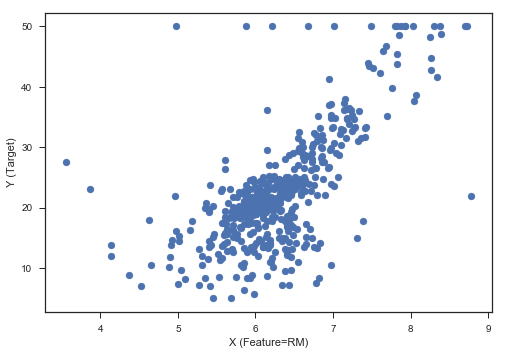

In [10]:
'''Scatter Plot between X (RM) & Y (Target)'''
plt.scatter(X.RM, Y)
plt.xlabel('X (Feature=RM)')
plt.ylabel('Y (Target)')
plt.show()

As you can see that there is a positive correlation between RM and housing prices.

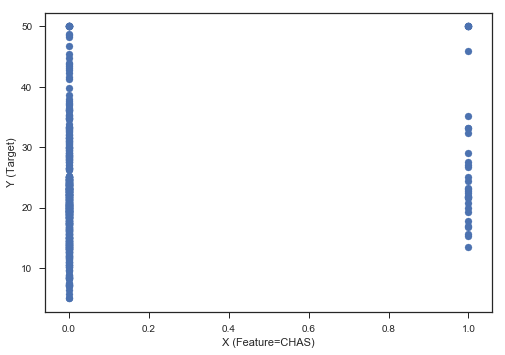

In [11]:
'''Scatter Plot between X (CHAS) & Y (Target)'''
plt.scatter(X.CHAS, Y)
plt.xlabel('X (Feature=CHAS)')
plt.ylabel('Y (Target)')
plt.show()

---

# Prediction

## 1.0  Prediction: Train-test splits Using all features

In [12]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, train_size=0.80, random_state = 5)

In [13]:
lm = LinearRegression()

lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
Y_pred = lm.predict(X_test)
Y_actual = Y_test

In [15]:
Combined_df = pd.DataFrame()
Combined_df = Combined_df.append(X_test)
Combined_df['Acutal_Y'] = Y_actual
Combined_df['Predicted_Y'] = Y_pred
Combined_df['Residual'] = Combined_df.apply(lambda row: row['Predicted_Y'] - row['Acutal_Y'], axis = 1)
Combined_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Acutal_Y,Predicted_Y,Residual
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6,37.560692,-0.039308
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9,32.145556,4.245556
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6,27.068334,4.468334
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8,5.666107,-8.133893
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2,35.096983,-0.103017


## 2.0 Prediction: Train-test splits Using two features RM, CHAS

In [16]:
X_train1, X_test1, Y_train1, Y_test1 = sklearn.cross_validation.train_test_split(X[['RM', 'CHAS']], Y, train_size=0.80, random_state = 5)

lm1 = LinearRegression()
lm1.fit(X_train1, Y_train1)

Y_pred1 = lm1.predict(X_test1)
Y_actual1 = Y_test1

Combined_df1 = pd.DataFrame()
Combined_df1 = Combined_df1.append(X_test1)
Combined_df1['Acutal_Y'] = Y_actual1
Combined_df1['Predicted_Y'] = Y_pred1
Combined_df1['Residual'] = Combined_df1.apply(lambda row: row['Predicted_Y'] - row['Acutal_Y'], axis = 1)
Combined_df1.head()

,RM,CHAS,Acutal_Y,Predicted_Y,Residual
226,8.040,0,37.6,37.611533,0.011533
292,6.630,0,27.9,25.318241,-2.581759
90,6.417,0,22.6,23.461169,0.861169
373,4.906,0,13.8,10.287293,-3.512707
273,7.691,1,35.2,38.988887,3.788887


## 3.0 Prediction: Train-test splits Using only 1 feature RM

In [17]:
X_train2, X_test2, Y_train2, Y_test2 = sklearn.cross_validation.train_test_split(X[['RM']],Y, train_size=0.80, random_state = 5)

lm2 = LinearRegression()
lm2.fit(X_train2, Y_train2)

Y_pred2 = lm2.predict(X_test2)
Y_actual2 = Y_test2

Combined_df2 = pd.DataFrame()
Combined_df2 = Combined_df2.append(X_test2)
Combined_df2['Acutal_Y'] = Y_actual2
Combined_df2['Predicted_Y'] = Y_pred2
Combined_df2['Residual'] = Combined_df2.apply(lambda row: row['Predicted_Y'] - row['Acutal_Y'], axis = 1)
Combined_df2.head()

,RM,Acutal_Y,Predicted_Y,Residual
226,8.040,37.6,38.101459,0.501459
292,6.630,27.9,25.660386,-2.239614
90,6.417,22.6,23.780989,1.180989
373,4.906,13.8,10.448747,-3.351253
273,7.691,35.2,35.022073,-0.177927


### Plots using only 1 feature = RM

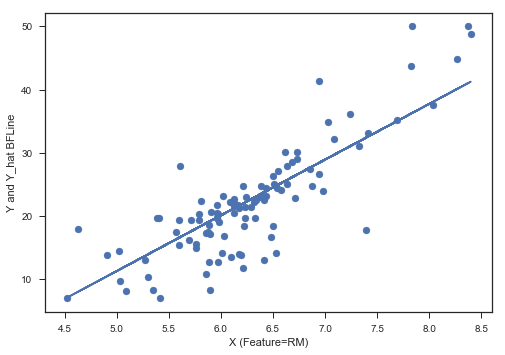

In [18]:
plt.scatter(X_test2, Y_test2)
plt.plot(X_test2, Y_pred2)
plt.xlabel('X (Feature=RM)')
plt.ylabel('Y and Y_hat BFLine')

----

### COMBINED

In [19]:
Compare_df = pd.DataFrame()
Compare_df['Actual Price'] = Y_actual
Compare_df['Predicted Price (all f)'] = Y_pred
Compare_df['Predicted Price (two f)'] = Y_pred1
Compare_df['Predicted Price (one f)'] = Y_pred2
Compare_df.head()

,Actual Price,Predicted Price (all f),Predicted Price (two f),Predicted Price (one f)
226,37.6,37.560692,37.611533,38.101459
292,27.9,32.145556,25.318241,25.660386
90,22.6,27.068334,23.461169,23.780989
373,13.8,5.666107,10.287293,10.448747
273,35.2,35.096983,38.988887,35.022073


# Accuracy of Models

## 1.0 Accuracy of model using all features

In [20]:
# MAE
print 'MAE', metrics.mean_absolute_error(Y_actual, Y_pred)

# MSE
print 'MSE', metrics.mean_squared_error(Y_actual, Y_pred)

# RMSE
print 'RMSE', np.sqrt(metrics.mean_squared_error(Y_actual, Y_pred))

# R^2/Model Score - Alternative: model.score(X_test,Y_test)
print 'R^2', metrics.r2_score(Y_actual, Y_pred)

MAE 3.2145117813
MSE 20.9028436804
RMSE 4.57196278204
R^2 0.733020681871


- Lower the MAE, MSE, RMSE better is the Model.
- R2 ranges between 0 to 1. ==> 0-Worst fit, ..1-best fit

##### Scatter Plot between Predicted vs Actual Values

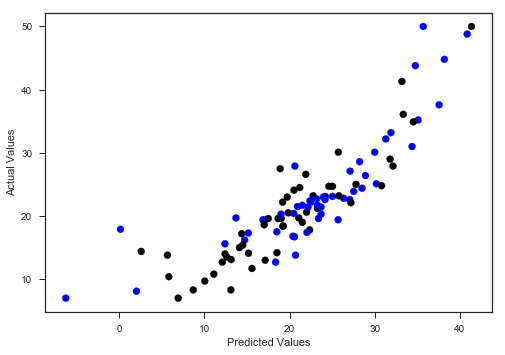

In [22]:
plt.scatter(Y_pred, Y_actual, c=['blue','black'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##### Residual PLOT

Residual Plot is plotted between:
    1. Predicted Values
    2. Residuals (Predicted_values - Actual_values)
    
    Residual plots are a good way to visualize the errors in your data.  If you have done a good then it should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing.

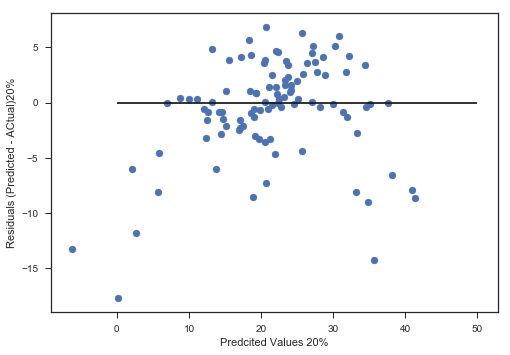

In [23]:
plt.scatter(Combined_df.Predicted_Y, Combined_df.Residual)
plt.xlabel('Predcited Values 20%')
plt.ylabel('Residuals (Predicted - ACtual)20%')
plt.hlines(y=0, xmin =0, xmax = 50)
plt.show()

## 2.0 Accuracy of model using two features

MAE 3.47978808132
MSE 23.6462252616
RMSE 4.86273845293
R^2 0.697981136289
Accuracy 69.7981136289


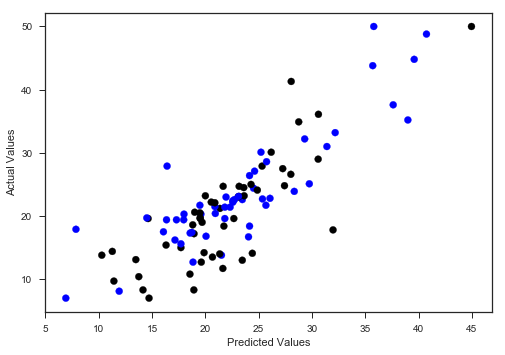

In [25]:
# MAE
print 'MAE', metrics.mean_absolute_error(Y_actual1, Y_pred1)

# MSE
print 'MSE', metrics.mean_squared_error(Y_actual1, Y_pred1)

# RMSE
print 'RMSE', np.sqrt(metrics.mean_squared_error(Y_actual1, Y_pred1))

# R^2
print 'R^2', metrics.r2_score(Y_actual1, Y_pred1)

# Predictive accuracy
print 'Accuracy', lm1.score(X_test1,Y_test1)*100

plt.scatter(Y_pred1, Y_actual1, c=['blue','black'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## 3.0 Accuracy of model using only 1 feature

MAE 3.47000490494
MSE 23.970455528
RMSE 4.89596318695
R^2 0.693839940155
Accuracy 69.3839940155


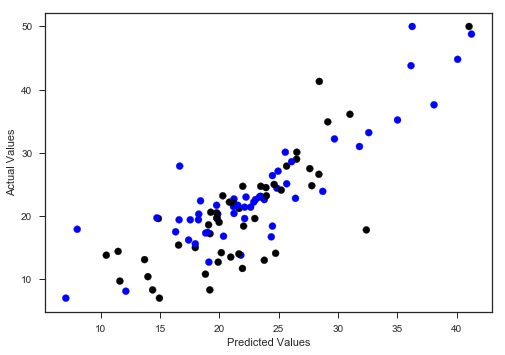

In [26]:
# MAE
print 'MAE', metrics.mean_absolute_error(Y_actual2, Y_pred2)

# MSE
print 'MSE', metrics.mean_squared_error(Y_actual2, Y_pred2)

# RMSE
print 'RMSE', np.sqrt(metrics.mean_squared_error(Y_actual2, Y_pred2))

# R^2
print 'R^2', metrics.r2_score(Y_actual2, Y_pred2)

# Predictive accuracy
print 'Accuracy', lm2.score(X_test2,Y_test2)*100

plt.scatter(Y_pred2, Y_actual2, c=['blue','black'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

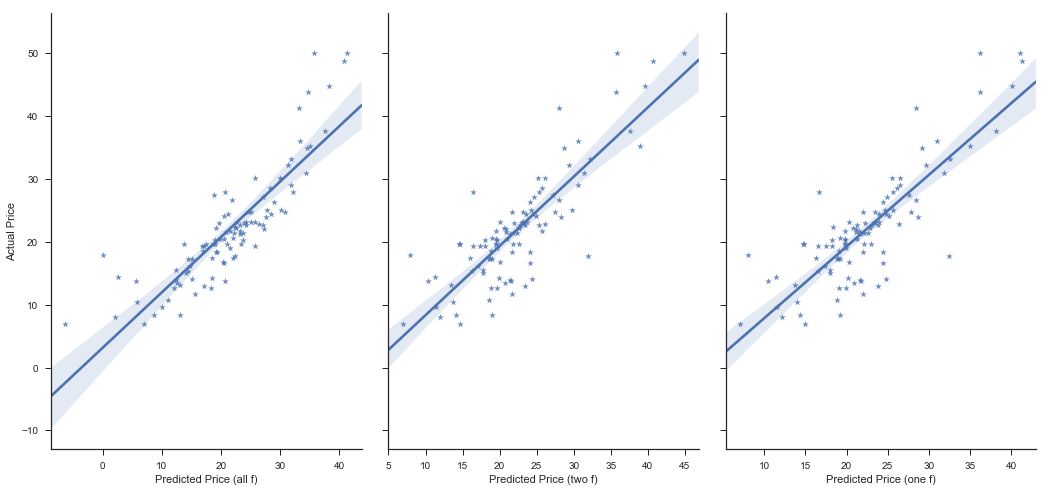

In [27]:
sns.pairplot(Compare_df, x_vars=['Predicted Price (all f)', 'Predicted Price (two f)', 'Predicted Price (one f)'], 
             y_vars='Actual Price' , size=7, aspect=0.7, kind='reg',markers = '*')

.

## Cross- Validation

### `Using Cross Validation instead of Train/Test splitting`

- It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset, and average the final accuracy on each subset to get the final score

- There are a bunch of cross validation methods. Basic two of them are: 
    1. K-Folds Cross Validation
    2. Leave One Out Cross Validation (LOOCV)


#### K-Folds Cross Validation

- In big datasets, K = 3 is usually advised. 
- In smaller datasets, K = 10 or, it’s best to use LOOCV.

In [88]:
# 1. Train/Test Splitting - 
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, train_size=0.80, random_state = 5)

lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_test_hat = lm.predict(X_test)
metrics.r2_score(Y_test, Y_test_hat)*100

73.302068187093369

In [89]:
# 2. Cross Validation using K_folds - 
model = LinearRegression()

K_fold = model_selection.KFold(n_splits=15, random_state=7)
Y_hat = model_selection.cross_val_predict(model, X, Y, cv=K_fold)
metrics.r2_score(Y, Y_hat)*100

61.521401673631772



.


.

# Regularisation

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

What does that bias and variance actually mean? Let us understand this by an example of archery targets.

Let’s say we have model which is very accurate, therefore the error of our model will be low, meaning a low bias and low variance as shown in first figure. All the data points fit within the bulls-eye. Similarly we can say that if the variance increases, the spread of our data point increases which results in less accurate prediction. And as the bias increases the error between our predicted value and the observed values increases.

<img src='Data/5.PNG'>

> Now how this bias and variance is balanced to have a perfect model? Take a look at the image below and try to understand

<img src='Data/6.PNG'>

As we add more and more parameters to our model, its complexity increases, which results in increasing variance and decreasing bias, i.e., overfitting. So we need to find out one optimum point in our model where the decrease in bias is equal to increase in variance. In practice, there is no analytical way to find this point. So how to deal with high variance or high bias?

To overcome underfitting or high bias, we can basically add new parameters to our model so that the model complexity increases, and thus reducing high bias.

Now, how can we overcome Overfitting for a regression model?

Basically there are two methods to overcome overfitting,

- Reduce the model complexity
- Regularization

- **Underfitting of model** - Less features/Less model complexity/High Bias/Low Variance = (Solution) Increase features
- **Fitting** - Optimum features/Optimum model complexity/Decrease in Bias = Increase in Variance/Minima Point
- **Overfitting of model** - More features/More model complexity/Low Bias/High Variance = (Solution) Decreas features OR Regularisation(introduce a Penalty) 

**Types**
1. Ridge Regularisation Regression (L2 Regularisation)
2. Lasso Regularisation Regression (L1 Regularisation)

## 1. Ridge Regression

`(Minimise) Cost Function = Least_Squares_Critierion + α(Sum of Square of coefficients)`

- α = 0 :      Simple Linear Regression
- α = value :  Ridge/Lasso Penalty

In [115]:
# Ridge using CV - 
Rm = Ridge(alpha=0.05, normalize=True)
K = model_selection.KFold(n_splits=15, random_state=7)
y_hat = model_selection.cross_val_predict(Rm, X, Y, cv=K)
metrics.r2_score(Y, y_hat)*100

63.128819453797782

In [116]:
# Ridge using Train/Test splits -
Rm = Ridge(alpha=0.48, normalize=True)
Rm.fit(X_train, Y_train)
Y_test_hat = Rm.predict(X_test)
metrics.r2_score(Y_test, Y_test_hat)*100

73.468600924036963

## 2. Lasso Regression

`(Minimise) Cost Function = Least_Squares_Critierion + α(Sum of absolute value of coefficients)`

In [121]:
# Lasso using CV - 
K = model_selection.KFold(n_splits=10,random_state=7)
Ls = Lasso(alpha=0.05, normalize=True)
Y_hat = model_selection.cross_val_predict(Ls, X, Y, cv=K)
metrics.r2_score(Y, Y_hat)*100

55.442341864934484

In [122]:
Ls = Lasso(alpha=0.05, normalize=True)
Ls.fit(X_train, Y_train)
Y_test_hat = Ls.predict(X_test)
metrics.r2_score(Y_test, Y_test_hat)*100

69.517995726055233

In [125]:
pd.DataFrame({'Features': X.columns, 'Coefficents Simple LR':lm.coef_, 'Coefficents Ridge':Rm.coef_, 'Coefficents Lasso':Ls.coef_}) 

,Coefficents Lasso,Coefficents Ridge,Coefficents Simple LR,Features
0,-0.000000,-0.079720,-0.130297,CRIM
1,0.000000,0.023365,0.049374,ZN
2,-0.000000,-0.071741,0.001527,INDUS
3,0.000000,2.766648,2.707557,CHAS
4,-0.000000,-4.667792,-16.007462,NOX
5,3.260735,3.355724,3.407416,RM
6,-0.000000,-0.008856,0.001183,AGE
7,-0.000000,-0.494187,-1.493811,DIS
8,-0.000000,0.035733,0.364266,RAD
9,-0.000000,-0.002311,-0.013165,TAX


___

# Gradient Descent Algorithm

In [9]:
data = pd.DataFrame({'House_Size': [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700],
                     'House_Price': [245000,312000,279000,308000,199000,219000,405000,324000,319000,255000]})

In [10]:
data

,House_Price,House_Size
0,245000,1400
1,312000,1600
2,279000,1700
3,308000,1875
4,199000,1100
5,219000,1550
6,405000,2350
7,324000,2450
8,319000,1425
9,255000,1700


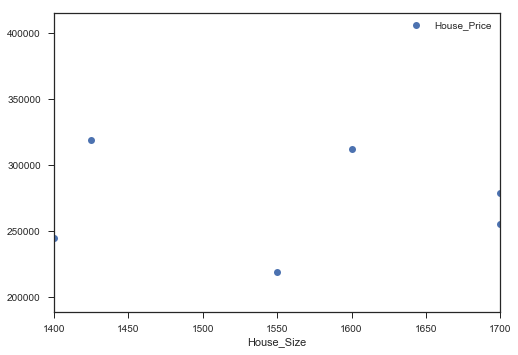

In [35]:
data.plot(x='House_Size',y='House_Price', style='o')